RANDOM FOREST (RF)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
data = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
print(data.Sex.unique())
print(data.ChestPainType.unique())
print(data.RestingECG.unique())
print(data.ExerciseAngina.unique())
print(data.ST_Slope.unique())

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


One Hot Encoding

In [9]:
df = pd.get_dummies(data=data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
                   , drop_first="True")*1
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [10]:
df.columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

Aykırı Değerleri Alt ve Üst Sınırlara Eşitleme

In [13]:
list =['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
for feature in list:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    ust_sinir = (Q3 + 1.5 * IQR)
    alt_sinir = (Q1 - 1.5 * IQR)
    print(f"{feature} için değerler Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}, alt sınır = {alt_sinir}, üst sınır = {ust_sinir}")
    alt_aykiri=df[df[feature]<alt_sinir][feature]
    ust_aykiri=df[df[feature]>ust_sinir][feature]
    print(f"Alt aykırı değerler:\n {alt_aykiri}\nUst aykırı değerler:\n{ust_aykiri}\n")
    df.loc[df[feature] < alt_sinir, feature] = alt_sinir
    df.loc[df[feature] > ust_sinir, feature] = ust_sinir

Age için değerler Q1 = 47.0, Q3 = 60.0, IQR = 13.0, alt sınır = 27.5, üst sınır = 79.5
Alt aykırı değerler:
 Series([], Name: Age, dtype: int64)
Ust aykırı değerler:
Series([], Name: Age, dtype: int64)

RestingBP için değerler Q1 = 120.0, Q3 = 140.0, IQR = 20.0, alt sınır = 90.0, üst sınır = 170.0
Alt aykırı değerler:
 314    80
449     0
Name: RestingBP, dtype: int64
Ust aykırı değerler:
109    190
123    180
189    180
190    180
241    200
274    180
275    180
278    180
365    200
372    185
399    200
411    180
423    180
475    178
550    172
585    180
592    190
673    174
702    178
725    180
732    200
759    192
774    178
780    180
855    180
880    172
Name: RestingBP, dtype: int64

Cholesterol için değerler Q1 = 173.25, Q3 = 267.0, IQR = 93.75, alt sınır = 32.625, üst sınır = 407.625
Alt aykırı değerler:
 293    0
294    0
295    0
296    0
297    0
      ..
514    0
515    0
518    0
535    0
536    0
Name: Cholesterol, Length: 172, dtype: int64
Ust aykırı değerler:


C:\Users\epata\AppData\Local\Temp\ipykernel_16872\4021639525.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '27.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < alt_sinir, feature] = alt_sinir
C:\Users\epata\AppData\Local\Temp\ipykernel_16872\4021639525.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '32.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[feature] < alt_sinir, feature] = alt_sinir


In [14]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40.0,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49.0,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37.0,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48.0,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54.0,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45.0,110,264.0,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68.0,144,193.0,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57.0,130,131.0,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57.0,130,236.0,0,174,0.0,1,0,1,0,0,0,0,0,1,0


MİN-MAX Normalizasyonu

In [15]:
def min_max(df, columns):
    for column in columns:
        min_val = df[column].min()
        max_val = df[column].max()
        df[column] = (df[column] - min_val) / (max_val - min_val)
    return df
columns_to_normalize = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df = min_max(df, columns_to_normalize)
print("Normalized DataFrame:\n", df[columns_to_normalize])

Normalized DataFrame:
           Age  RestingBP  Cholesterol     MaxHR   Oldpeak
0    0.244898      0.625     0.683667  0.779412  0.375000
1    0.428571      0.875     0.393000  0.661765  0.541667
2    0.183673      0.500     0.667667  0.235294  0.375000
3    0.408163      0.600     0.483667  0.308824  0.625000
4    0.530612      0.750     0.433000  0.411765  0.375000
..        ...        ...          ...       ...       ...
913  0.346939      0.250     0.617000  0.485294  0.575000
914  0.816327      0.675     0.427667  0.551471  0.941667
915  0.591837      0.500     0.262333  0.360294  0.575000
916  0.591837      0.500     0.542333  0.794118  0.375000
917  0.204082      0.600     0.379667  0.786765  0.375000

[918 rows x 5 columns]


In [16]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.625,0.683667,0,0.779412,0.375000,0,1,1,0,0,1,0,0,0,1
1,0.428571,0.875,0.393000,0,0.661765,0.541667,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.500,0.667667,0,0.235294,0.375000,0,1,1,0,0,0,1,0,0,1
3,0.408163,0.600,0.483667,0,0.308824,0.625000,1,0,0,0,0,1,0,1,1,0
4,0.530612,0.750,0.433000,0,0.411765,0.375000,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.250,0.617000,0,0.485294,0.575000,1,1,0,0,1,1,0,0,1,0
914,0.816327,0.675,0.427667,1,0.551471,0.941667,1,1,0,0,0,1,0,0,1,0
915,0.591837,0.500,0.262333,0,0.360294,0.575000,1,1,0,0,0,1,0,1,1,0
916,0.591837,0.500,0.542333,0,0.794118,0.375000,1,0,1,0,0,0,0,0,1,0


Kolerasyon Matrisi ve p-value hesabı

In [17]:
from scipy.stats import pearsonr

Text(0.5, 1.0, 'Features Correlating with Heart Disease')

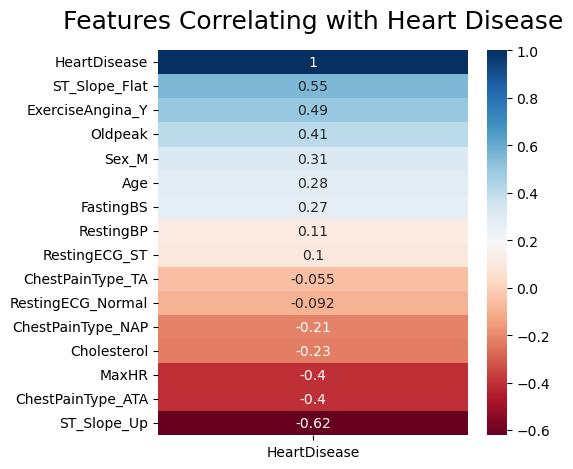

In [18]:
plt.figure(figsize=(5,5))
corr = sns.heatmap(df.corr()[["HeartDisease"]].sort_values(by="HeartDisease",ascending=False), cmap='RdBu', annot=True)
corr.set_title('Features Correlating with Heart Disease', fontdict={'fontsize':18}, pad=16)

In [19]:
x = df[['HeartDisease']]
x2 = np.squeeze(x)
columns = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Sex_M','ChestPainType_ATA', 'ChestPainType_NAP', 
        'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
        'ExerciseAngina_Y', 'ST_Slope_Flat', 'ST_Slope_Up']

In [20]:
del_columns = []
for feature in columns:
    y = df[feature]
    y2 = np.squeeze(y)
    corr, p_value = pearsonr(x2,y2)
    print(f"{feature} için Pearson korelasyon katsayısı: {corr}, p-değeri: {p_value}")
    if p_value < 0.05:
        print(f"{feature} ile HeartDisease arasında istatistiksel olarak anlamlı bir ilişki var.\n")
    else:
        print(f"{feature} ile HeartDisease arasında istatistiksel olarak anlamlı bir ilişki yok.\n")
        del_columns.append(feature)

Age için Pearson korelasyon katsayısı: 0.28203850581899736, p-değeri: 3.007953240049735e-18
Age ile HeartDisease arasında istatistiksel olarak anlamlı bir ilişki var.

RestingBP için Pearson korelasyon katsayısı: 0.11319140451146113, p-değeri: 0.0005905746331927635
RestingBP ile HeartDisease arasında istatistiksel olarak anlamlı bir ilişki var.

Cholesterol için Pearson korelasyon katsayısı: -0.2253041381078144, p-değeri: 4.982879146847273e-12
Cholesterol ile HeartDisease arasında istatistiksel olarak anlamlı bir ilişki var.

FastingBS için Pearson korelasyon katsayısı: 0.267291186110298, p-değeri: 1.7535980103299483e-16
FastingBS ile HeartDisease arasında istatistiksel olarak anlamlı bir ilişki var.

MaxHR için Pearson korelasyon katsayısı: -0.4005194792670913, p-değeri: 1.0894955874480017e-36
MaxHR ile HeartDisease arasında istatistiksel olarak anlamlı bir ilişki var.

Oldpeak için Pearson korelasyon katsayısı: 0.4102107845941224, p-değeri: 1.4348028058215675e-38
Oldpeak ile HeartDis

In [21]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [23]:
print(X_train.shape)
print(X_test.shape)

(642, 15)
(276, 15)


In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
rfc = RandomForestClassifier(n_estimators=305, random_state=23)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=305, random_state=23)

In [28]:
feature_scores = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores

ST_Slope_Up          0.142064
Oldpeak              0.122043
ST_Slope_Flat        0.114464
Cholesterol          0.108048
MaxHR                0.102982
ExerciseAngina_Y     0.096556
Age                  0.095017
RestingBP            0.073657
ChestPainType_ATA    0.034464
Sex_M                0.029899
ChestPainType_NAP    0.025615
FastingBS            0.022013
RestingECG_Normal    0.015171
RestingECG_ST        0.010651
ChestPainType_TA     0.007357
dtype: float64

Text(0, 0.5, 'Öznitelikler')

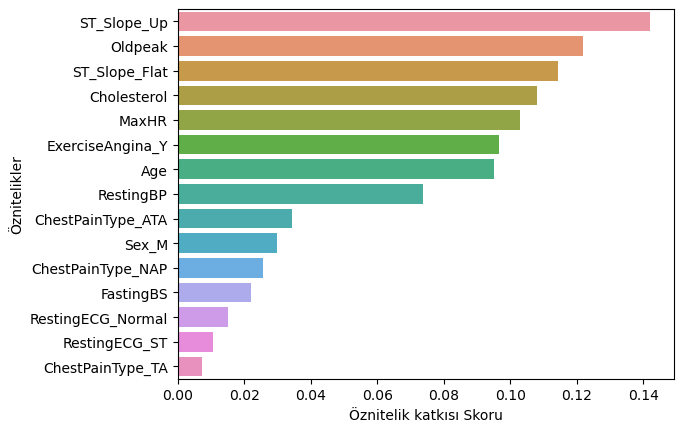

In [29]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Öznitelik katkısı Skoru')
plt.ylabel('Öznitelikler')

In [30]:
y_pred = rfc.predict(X_test)

In [31]:
accuracy = accuracy_score(y_test, y_pred)
print(f"300 karar ağaçlı modelin Accuracy değeri: {accuracy}")

300 karar ağaçlı modelin Accuracy değeri: 0.8913043478260869


In [32]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

Precision: 0.9036144578313253


In [33]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

Recall: 0.9146341463414634


In [34]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

F1 Score: 0.9090909090909091


confusion Matrix

 [[ 96  16]
 [ 14 150]] 




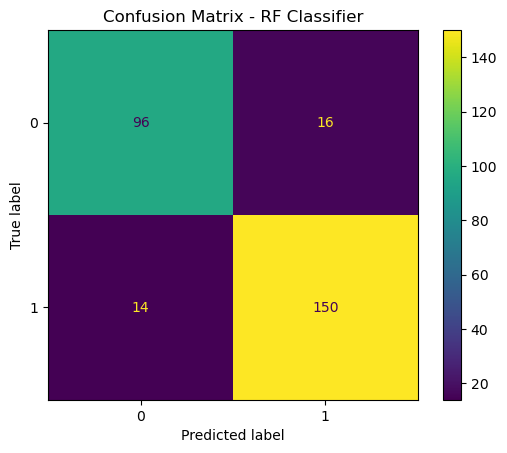

In [35]:
cm = confusion_matrix(y_test, y_pred)
print('confusion Matrix\n\n', cm, '\n\n')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rfc.classes_)
disp.plot()
plt.title('Confusion Matrix - RF Classifier')
plt.show()

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       112
           1       0.90      0.91      0.91       164

    accuracy                           0.89       276
   macro avg       0.89      0.89      0.89       276
weighted avg       0.89      0.89      0.89       276



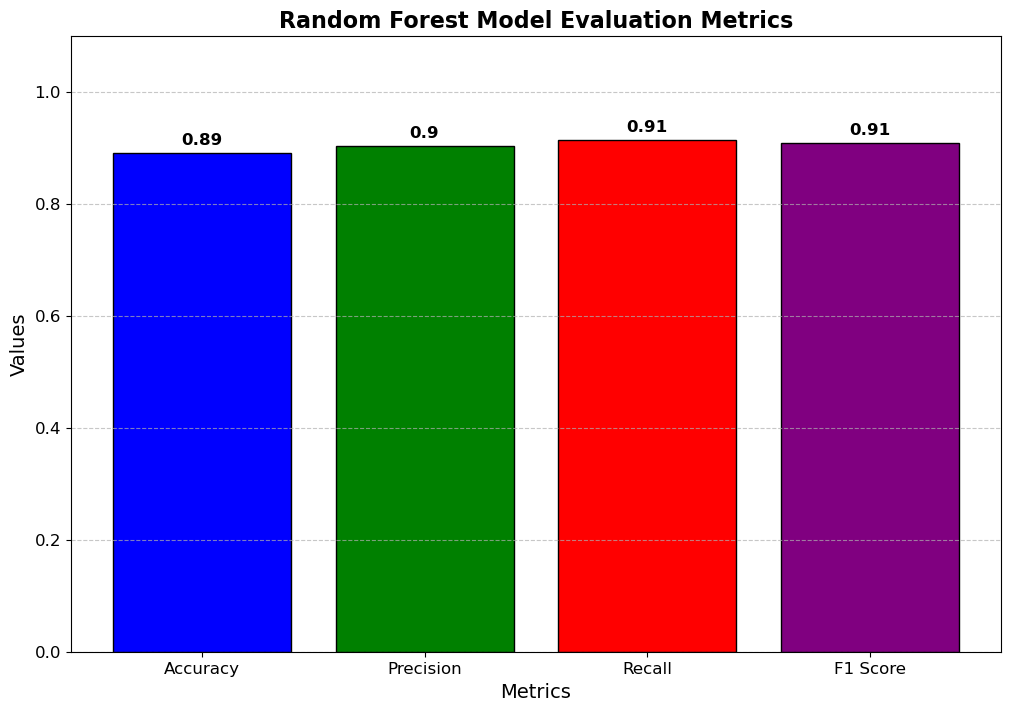

In [37]:
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
    
}

plt.figure(figsize=(12, 8))
bars = plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'], edgecolor='black')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, round(yval, 2), ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.title('Random Forest Model Evaluation Metrics', fontsize=16, fontweight='bold')
plt.ylim(0, 1.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [38]:
from sklearn.metrics import roc_curve, auc

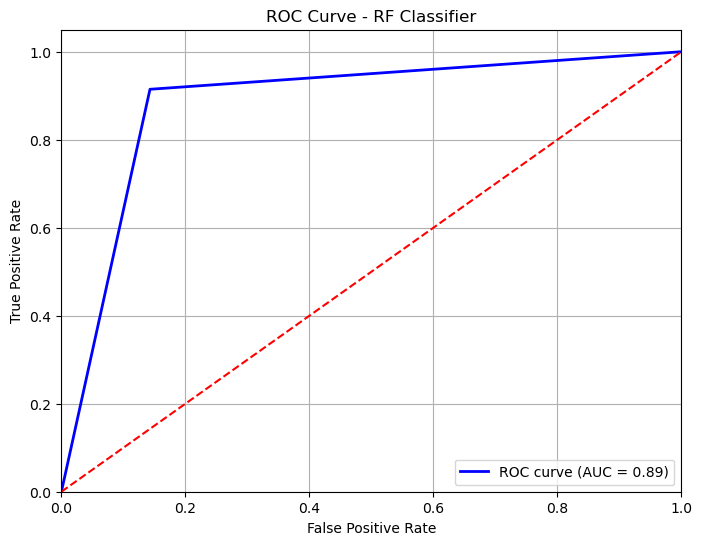

In [40]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# ROC eğrisini çizdirelim
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RF Classifier')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()